# Mid-term Exam-Image Processing and Pattern Recognition. Spring 2024.


o Submit only `ipynb file`.


### `1. Obtain cyan, magenta, yellow channels of the following image, and draw them. (10 pts)`

`Note) You can not use cv2`

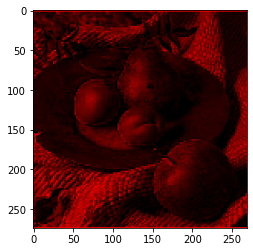

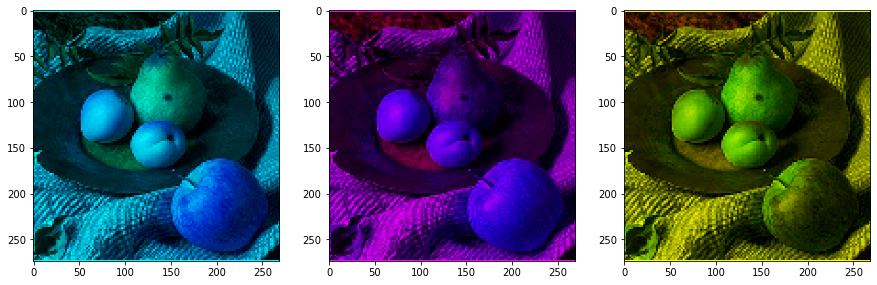

In [51]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import cv2

src = cv2.imread('apple.png')

h,w = src.shape[0], src.shape[1]
src_alpha = np.zeros((h,w,4),dtype=src.dtype)
src_alpha[:,:,:3] = src[:,:,:3]
alpha = np.zeros((h,w),dtype=src_alpha.dtype)

src_R = np.zeros_like(src)
src_R[:,:,0] = src[:,:,0]


src_G = np.zeros_like(src)
src_G[:,:,1] = src[:,:,1]

src_B = np.zeros_like(src)
src_B[:,:,2] = src[:,:,2]


src_c = src_G + src_B


src_m = src_R + src_B


src_Y = src_R + src_G


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(src_c) 
axes[1].imshow(src_m)
axes[2].imshow(src_Y)

### `2. Draw the following image without using cv2. (20 pts)`

- You can set the size of image as you want

<img src='prob2.png'>

In [1]:
import turtle


wn = turtle.Screen()
wn.bgcolor("white")
wn.title("Drawing a Circle on a Square")


square = turtle.Turtle()
square.color("blue")
square.begin_fill()
for _ in range(4):
    square.forward(200)
    square.left(90)
square.end_fill()
square.hideturtle()


circle = turtle.Turtle()
circle.penup()
circle.goto(100, 0)  
circle.pendown()
circle.color("green")
circle.begin_fill()
circle.circle(100, 180) 
circle.end_fill()

circle.right(360) 
circle.penup()
circle.goto(100, 0)
circle.pendown()
circle.color("red")
circle.begin_fill()
circle.circle(-100, 180)  
circle.end_fill()


circle.hideturtle()
wn.mainloop()

### `3. "logo.png" is a PNG image with alpha channel to support transparent background. Add the logo to the center point of "messi.jpg" using alpha channel as mask and bitwise operation. (20 pts)`

- You can use `cv2.bitwise_not` and `cv2.bitwise_and`

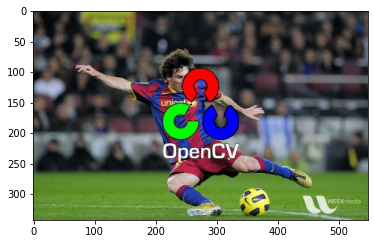

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

fg = cv2.imread("logo.png") #객체 
# fg = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
bg = cv2.imread("messi.jpg")

h, w = fg.shape[:2] # 색상 채널은 포함 안시킬려고 0,1까지 인덱싱
final = np.copy(bg)
H,W = bg.shape[:2]


final[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w] = fg


mask = (fg[:,:,0] < 20) & (fg[:,:,1] < 20) & (fg[:,:,2] < 20) #각 색에 검정색에 가까운것을 마스크
mask = (mask*255).astype(np.uint8)


mask_3d = mask[:,:,np.newaxis]
mask_3d_bg = np.repeat(mask_3d, 3, axis=2)


mask_3d_fg = ~mask_3d_bg


fg = fg & mask_3d_fg
bg[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w] = bg[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w] & mask_3d_bg  # 백그라운드 이미지에서 포그라운드 이미지 크기 만큼 때온 후 마스킹 된 백그라운드와 비트 연산


bg[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w] = fg + bg[int(H/2)-int(h/2):int(H/2)-int(h/2)+h, int(W/2)-int(w/2):int(W/2)-int(w/2)+w]

plt.imshow(bg[:,:,::-1])
plt.show()


### `4. Enlarge the given image src by the given ratio. (20 pts)`

- Reverse projection and interpolation should be used.

Text(0.5, 1.0, 'reverse Image')

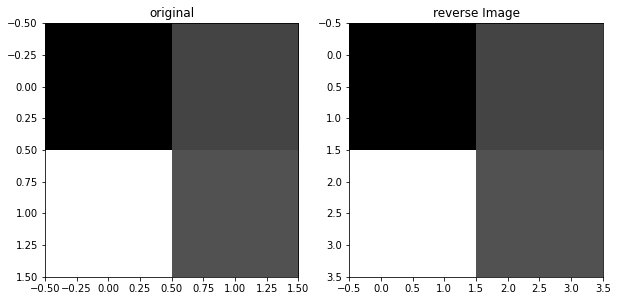

In [12]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

src = np.array([[180,200],[255,204]])

Ratio = 2

H,W = src.shape[:2]
H,W

H_dst,W_dst = int(H*Ratio),int(W*Ratio)

dst = np.zeros((H_dst,W_dst),dtype=np.uint8)

for h in range(H_dst):
    for w in range(W_dst):
        h_src = int(h/Ratio) 
        w_src = int(w/Ratio)
        dst[h,w] = src[h_src,w_src]
        
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[0].set_title('original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('reverse Image')



Text(0.5, 1.0, 'interpolation')

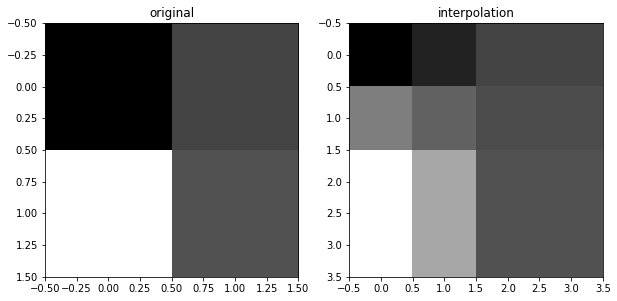

In [13]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

src= np.array([[180,200],[255,204]])

Ratio = 2

H,W = src.shape[:2]
H,W

H_dst,W_dst = int(H*Ratio),int(W*Ratio)

dst = np.zeros((H_dst,W_dst),dtype=np.uint8)

for h in range(H_dst):
    for w in range(W_dst):
        w_src = w/Ratio
        h_src = h/Ratio
        alpha = w_src - int(w_src)
        beta = h_src - int(h_src)
        A_index = int(h_src), int(w_src) 
        B_index = int(h_src), min(int(w_src)+1,W-1)
        C_index = min(int(h_src)+1,H-1), int(w_src)
        D_index = min(int(h_src)+1,H-1), min(int(w_src)+1,W-1)
        
        E_value = (1-alpha)*src[A_index]+alpha*src[B_index]
        F_value = (1-alpha)*src[C_index]+alpha*src[D_index]
        X_value = (1-beta)*E_value+beta*F_value
        dst[h,w] = X_value
        
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[0].set_title('original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('interpolation')

### `5. Remove the noise in the src image without changing anything else. (20 pts)`

Text(0.5, 1.0, 'Open')

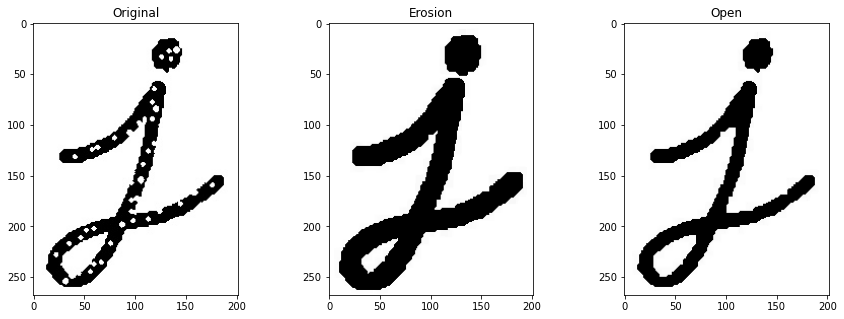

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
src = cv2.imread("j.jpg")
# plt.imshow(src)
# plt.show()

kernel = np.ones((3,3))

erosion = cv2.erode(src, kernel, iterations=3)
open = cv2.dilate(erosion, kernel, iterations=3)


# plt.imshow(open)
# plt.show()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(src, cmap= 'gray')
axes[0].set_title('Original')
axes[1].imshow(erosion,cmap= 'gray')
axes[1].set_title('Erosion')
axes[2].imshow(open, cmap = 'gray')
axes[2].set_title('Open')

### `6. Strech the given image src so that the min and max pixel values become MIN and MAX, respectively. (10 pts)`


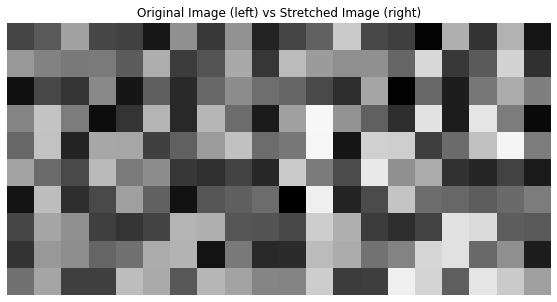

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = np.random.randint(low=10, high=200, size=(10, 10), dtype=np.uint8)
MIN=20
MAX=200

# Convert image to grayscale
# gray_image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

stretched_image = np.uint8((src - MIN) * (255.0 / (MAX - MIN)))

# Convert stretched image to color for stacking
stretched_image_color = cv2.cvtColor(stretched_image, cv2.COLOR_GRAY2RGB)

# Horizontally stack original and stretched images
hstack_image = np.hstack((cv2.cvtColor(src, cv2.COLOR_BGR2RGB), stretched_image_color))

plt.figure(figsize=(10, 5))
plt.imshow(hstack_image)
plt.title('Original Image (left) vs Stretched Image (right)')
plt.axis('off')
plt.show()